In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from scipy.stats import wasserstein_distance
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, recall_score, precision_score

from runIBU import *

from aif360.algorithms.preprocessing import DisparateImpactRemover
from aif360.datasets import BinaryLabelDataset


pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'


In [29]:
means1 = np.round(np.linspace(40,60, 21))
means1

array([40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60.])

In [30]:
means0 = np.round(np.linspace(60,60, 21))
means0

array([60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
       60., 60., 60., 60., 60., 60., 60., 60.])

In [31]:
biases1 = np.round(np.linspace(0.2, -0.2, 21),2)
biases1

array([ 0.2 ,  0.18,  0.16,  0.14,  0.12,  0.1 ,  0.08,  0.06,  0.04,
        0.02,  0.  , -0.02, -0.04, -0.06, -0.08, -0.1 , -0.12, -0.14,
       -0.16, -0.18, -0.2 ])

In [32]:
biases0 = np.round(np.linspace(-0.2, -0.2, 21),2)
biases0

array([-0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2,
       -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2])

In [33]:
biases0-biases1

array([-0.4 , -0.38, -0.36, -0.34, -0.32, -0.3 , -0.28, -0.26, -0.24,
       -0.22, -0.2 , -0.18, -0.16, -0.14, -0.12, -0.1 , -0.08, -0.06,
       -0.04, -0.02,  0.  ])

In [367]:
# for i in range(len(train_sets)):
#     train_sets[i].to_csv(f'Data1/train_data{i}',index=False)
#     test_sets[i].to_csv(f'Data1/test_data{i}',index=False)
    

In [106]:
results= pd.read_csv('all_resulst.csv')

In [108]:
results.head()

,Wdist0,Wdist1,MEDI1,MEDI10,MEDI11,MEDI08,MEDI080,MEDI081,MEIBU,MEIBU0,...,F1NB0,F1NB1,PrecisionNB,PrecisionNB0,PrecisionNB1,RecallNB,RecallNB0,RecallNB1,SPNB,CSPNB
0,0.000147,0.000027,6.665000,5.360000,1.305000,6.665000,5.360000,1.305000,1.974667,1.109000,...,0.764955,0.945582,0.945709,1.000000,0.896781,0.764512,0.619375,1.0,-0.017493,0.717751
1,0.000135,0.000021,6.714167,5.337333,1.376833,6.714167,5.337333,1.376833,1.979167,1.085833,...,0.760994,0.949916,0.945790,0.993758,0.904609,0.768150,0.616576,1.0,-0.031684,0.707127
2,0.000142,0.000032,6.652167,5.152000,1.500167,6.652167,5.152000,1.500167,1.993833,1.101833,...,0.750850,0.955703,0.953380,1.000000,0.915164,0.761284,0.601089,1.0,-0.044484,0.748484
3,0.000112,0.000027,6.562833,4.966667,1.596167,6.562833,4.966667,1.596167,1.970500,1.065333,...,0.742776,0.956339,0.953266,1.000000,0.916331,0.757156,0.590806,1.0,-0.056730,0.776271
4,0.000138,0.000030,6.312000,4.662833,1.649167,6.312000,4.662833,1.649167,2.003333,1.127000,...,0.754083,0.959058,0.956164,1.000000,0.921337,0.768046,0.605243,1.0,-0.056715,0.730890


In [107]:
results['MEDI1']=results.MEDI1 /6000 #normalize by the length of test data set
results['MEDI10']=results.MEDI10 /6000 
results['MEDI11']=results.MEDI11 /6000 
results['MEDI08']=results.MEDI08 /6000 
results['MEDI081']=results.MEDI081 /6000 
results['MEDI080']=results.MEDI080 /6000 
results['MEIBU']=results.MEIBU /6000 
results['MEIBU1']=results.MEIBU1 /6000 
results['MEIBU0']=results.MEIBU0 /6000 



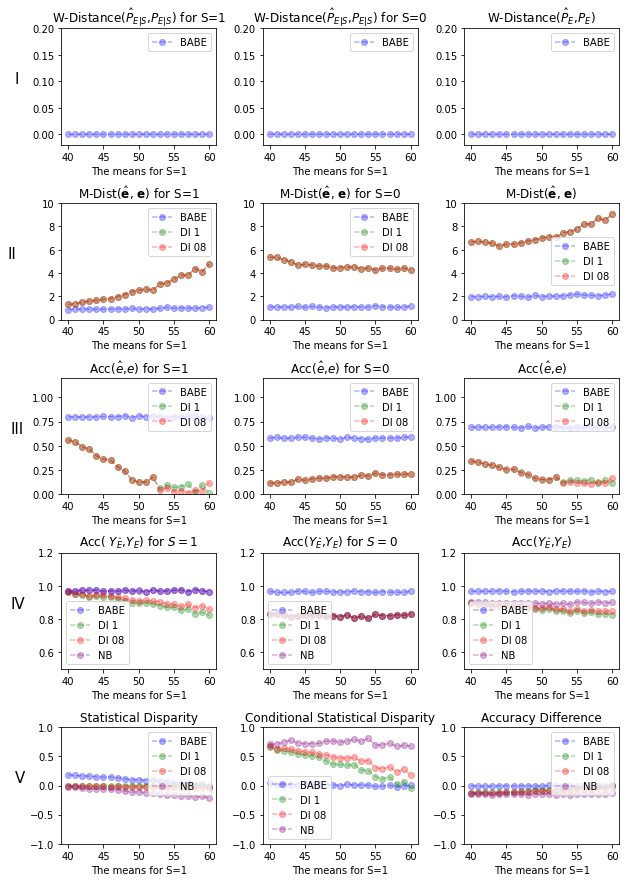

In [110]:
fig, axes = plt.subplots(5, 3,  figsize=(10,15))
#fig.suptitle('Results When Cahnging Mean for group 1')
#fig.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.3)
a=0
b=21


axes[0][0].plot( means1,'Wdist1', data=results.iloc[a:b], linestyle='--',marker='o', color="blue", alpha=0.3)

axes[0][0].set_ylim(-0.02,0.2)
axes[0][0].legend(['BABE', 'DI 1', 'DI 08'])
axes[0][0].set_xlabel('The means for S=1')
axes[0][0].set_title(r'W-Distance($\hat{P}_{E|S}$,$P_{E|S}$) for S=1')
axes[0][0].set_ylabel('I',rotation=360, size=15,labelpad=15)

axes[0][1].plot( means1,'Wdist0', data=results.iloc[a:b], linestyle='--',marker='o', color="blue", alpha=0.3)

axes[0][1].set_ylim(-0.02,0.2)
axes[0][1].set_title(r'W-Distance($\hat{P}_{E|S}$,$P_{E|S}$) for S=0')
axes[0][1].legend(['BABE', 'DI 1', 'DI 08'])
axes[0][1].set_xlabel('The means for S=1')



axes[0][2].plot( means1,'Wdist', data=results.iloc[a:b], linestyle='--',marker='o', color="blue", alpha=0.3)

axes[0][2].set_ylim(-0.02,0.2)
axes[0][2].set_xlabel('The means for S=1')
axes[0][2].set_title(r'W-Distance($\hat{P}_{E}$,$P_{E}$)')
axes[0][2].legend(['BABE', 'DI 1', 'DI 08'])
axes[0][2].set_xlabel('The means for S=1')



axes[1][0].plot( means1,'MEIBU1', data=results.iloc[a:b], linestyle='--',marker='o', color="blue", alpha=0.3)
axes[1][0].plot( means1,'MEDI11', data=results.iloc[a:b], linestyle='--',marker='o', color="green", alpha=0.3)
axes[1][0].plot( means1,'MEDI081', data=results.iloc[a:b], linestyle='--',marker='o', color="red", alpha=0.3)
axes[1][0].set_ylim(0,10)
axes[1][0].legend(['BABE', 'DI 1', 'DI 08'])
axes[1][0].set_xlabel('The means for S=1')
axes[1][0].set_title(r'M-Dist($\hat{\bf{e}}}$, $\bf{e}$) for S=1')
axes[1][0].set_ylabel('II',rotation=360, size=15,labelpad=30)

axes[1][1].plot( means1,'MEIBU0', data=results.iloc[a:b], linestyle='--',marker='o', color="blue", alpha=0.3)
axes[1][1].plot( means1,'MEDI10', data=results.iloc[a:b], linestyle='--',marker='o', color="green", alpha=0.3)
axes[1][1].plot( means1,'MEDI080', data=results.iloc[a:b], linestyle='--',marker='o', color="red", alpha=0.3)
axes[1][1].set_ylim(0,10)
axes[1][1].set_title(r'M-Dist($\hat{\bf{e}}}$, $\bf{e}$) for S=0')
axes[1][1].legend(['BABE', 'DI 1', 'DI 08'])
axes[1][1].set_xlabel('The means for S=1')


axes[1][2].plot( means1,'MEIBU', data=results.iloc[a:b], linestyle='--',marker='o', color="blue", alpha=0.3)
axes[1][2].plot( means1,'MEDI1', data=results.iloc[a:b], linestyle='--',marker='o', color="green", alpha=0.3)
axes[1][2].plot( means1,'MEDI08', data=results.iloc[a:b], linestyle='--',marker='o', color="red", alpha=0.3)
axes[1][2].set_ylim(0,10)
axes[1][2].set_xlabel('The means for S=1')
axes[1][2].set_title(r'M-Dist($\hat{\bf{e}}}$, $\bf{e}$)')
axes[1][2].legend(['BABE', 'DI 1', 'DI 08'])
axes[1][2].set_xlabel('The means for S=1')




axes[2][2].plot( means1,'AccEIBU', data=results.iloc[a:b], linestyle='--',marker='o', color="blue", alpha=0.3)
axes[2][2].plot( means1,'AccEDI1', data=results.iloc[a:b], linestyle='--',marker='o', color="green", alpha=0.3)
axes[2][2].plot( means1,'AccEDI08', data=results.iloc[a:b], linestyle='--',marker='o', color="red", alpha=0.3)
axes[2][2].set_ylim(0,1.2)
axes[2][2].set_title(r'Acc($\hat{e}$,$e$)')
axes[2][2].set_xlabel('The means for S=1')
axes[2][2].legend(['BABE', 'DI 1', 'DI 08'])

axes[2][1].plot( means1,'AccEIBU0', data=results.iloc[a:b], linestyle='--',marker='o', color="blue", alpha=0.3)
axes[2][1].plot( means1,'AccEDI10', data=results.iloc[a:b], linestyle='--',marker='o', color="green", alpha=0.3)
axes[2][1].plot( means1,'AccEDI080', data=results.iloc[a:b], linestyle='--',marker='o', color="red", alpha=0.3)
axes[2][1].set_ylim(0,1.2)
axes[2][1].set_title(r'Acc($\hat{e}$,$e$) for S=0')
axes[2][1].set_xlabel('The means for S=1')
axes[2][1].legend(['BABE', 'DI 1', 'DI 08'])

axes[2][0].plot( means1,'AccEIBU1', data=results.iloc[a:b], linestyle='--',marker='o', color="blue", alpha=0.3)
axes[2][0].plot( means1,'AccEDI11', data=results.iloc[a:b], linestyle='--',marker='o', color="green", alpha=0.3)
axes[2][0].plot( means1,'AccEDI081', data=results.iloc[a:b], linestyle='--',marker='o', color="red", alpha=0.3)
axes[2][0].set_ylim(0,1.2)
axes[2][0].set_title(r'Acc($\hat{e}$,$e$) for S=1')
axes[2][0].set_xlabel('The means for S=1')
axes[2][0].legend(['BABE', 'DI 1', 'DI 08'])
axes[2][0].set_ylabel('III',rotation=360, size=15, labelpad=15)



axes[3][2].plot( means1,'AccYIBU', data=results.iloc[a:b], linestyle='--',marker='o', color="blue", alpha=0.3)
axes[3][2].plot( means1,'AccYDI1', data=results.iloc[a:b], linestyle='--',marker='o', color="green", alpha=0.3)
axes[3][2].plot( means1,'AccYDI08', data=results.iloc[a:b], linestyle='--',marker='o', color="red", alpha=0.3)
axes[3][2].plot( means1,'AccYNB', data=results.iloc[a:b], linestyle='--',marker='o', color="purple", alpha=0.3)
axes[3][2].set_ylim(0.5,1.2)
axes[3][2].set_title(r'Acc($Y_{\hat{E}}$,$Y_E$)')
axes[3][2].set_xlabel('The means for S=1')
axes[3][2].legend(['BABE', 'DI 1', 'DI 08', 'NB'])


axes[3][1].plot( means1,'AccYIBU0', data=results.iloc[a:b], linestyle='--',marker='o', color="blue", alpha=0.3)
axes[3][1].plot( means1,'AccYDI10', data=results.iloc[a:b], linestyle='--',marker='o', color="green", alpha=0.3)
axes[3][1].plot( means1,'AccYDI080', data=results.iloc[a:b], linestyle='--',marker='o', color="red", alpha=0.3)
axes[3][1].plot( means1,'AccYNB0', data=results.iloc[a:b], linestyle='--',marker='o', color="purple", alpha=0.3)
axes[3][1].set_ylim(0.5,1.2)
axes[3][1].set_title(r'Acc($Y_{\hat{E}}$,$Y_E$) for $S=0$' )
axes[3][1].set_xlabel('The means for S=1')
axes[3][1].legend(['BABE', 'DI 1', 'DI 08', 'NB'])

axes[3][0].plot( means1,'AccYIBU1', data=results.iloc[a:b], linestyle='--',marker='o', color="blue", alpha=0.3)
axes[3][0].plot( means1,'AccYDI11', data=results.iloc[a:b], linestyle='--',marker='o', color="green", alpha=0.3)
axes[3][0].plot( means1,'AccYDI081', data=results.iloc[a:b], linestyle='--',marker='o', color="red", alpha=0.3)
axes[3][0].plot( means1,'AccYNB1', data=results.iloc[a:b], linestyle='--',marker='o', color="purple", alpha=0.3)
axes[3][0].set_ylim(0.5,1.2)
axes[3][0].set_title(r'Acc( $Y_{\hat{E}}$,$Y_E$) for $S=1$' )
axes[3][0].set_xlabel('The means for S=1')
axes[3][0].legend(['BABE', 'DI 1', 'DI 08', 'NB'])
axes[3][0].set_ylabel('IV',rotation=360, size=15,labelpad=20)



axes[4][0].plot( means1,'SPIBU', data=results.iloc[a:b], linestyle='--',marker='o', color="blue", alpha=0.3)
axes[4][0].plot( means1,'SPDI1', data=results.iloc[a:b], linestyle='--',marker='o', color="green", alpha=0.3)
axes[4][0].plot( means1,'SPDI08', data=results.iloc[a:b], linestyle='--',marker='o', color="red", alpha=0.3)
axes[4][0].plot( means1,'SPNB', data=results.iloc[a:b], linestyle='--',marker='o', color="purple", alpha=0.3)
axes[4][0].set_ylim(-1,1)
axes[4][0].set_title('Statistical Disparity')
axes[4][0].set_xlabel('The means for S=1')
axes[4][0].legend(['BABE', 'DI 1', 'DI 08', 'NB'])
axes[4][0].set_ylabel('V',rotation=360, size=15, labelpad=10)

axes[4][1].plot( means1,'CSPIBU', data=results.iloc[a:b], linestyle='--',marker='o', color="blue", alpha=0.3)
axes[4][1].plot( means1,'CSPDI1', data=results.iloc[a:b], linestyle='--',marker='o', color="green", alpha=0.3)
axes[4][1].plot( means1,'CSPDI08', data=results.iloc[a:b], linestyle='--',marker='o', color="red", alpha=0.3)
axes[4][1].plot( means1,'CSPNB', data=results.iloc[a:b], linestyle='--',marker='o', color="purple", alpha=0.3)
axes[4][1].set_ylim(-1,1)
axes[4][1].set_title('Conditional Statistical Disparity')
axes[4][1].set_xlabel('The means for S=1')
axes[4][1].legend(['BABE', 'DI 1', 'DI 08', 'NB'])

axes[4][2].plot( means1,results.iloc[a:b].AccYIBU0-results.iloc[a:b].AccYIBU1, linestyle='--',marker='o', color="blue", alpha=0.3)
axes[4][2].plot( means1, results.iloc[a:b].AccYDI10-results.iloc[a:b].AccYDI11,linestyle='--',marker='o', color="green", alpha=0.3)
axes[4][2].plot( means1, results.iloc[a:b].AccYDI080-results.iloc[a:b].AccYDI081,linestyle='--',marker='o', color="red", alpha=0.3)
axes[4][2].plot( means1, results.iloc[a:b].AccYNB0-results.iloc[a:b].AccYNB1,linestyle='--',marker='o', color="purple", alpha=0.3)
axes[4][2].set_ylim(-1,1)
axes[4][2].set_title(r'Accuracy Difference')
axes[4][2].set_xlabel('The means for S=1')
axes[4][2].legend(['BABE', 'DI 1', 'DI 08', 'NB'])



plt.savefig('Results_Synthetic_Means.jpg')


In [103]:
100*100

10000

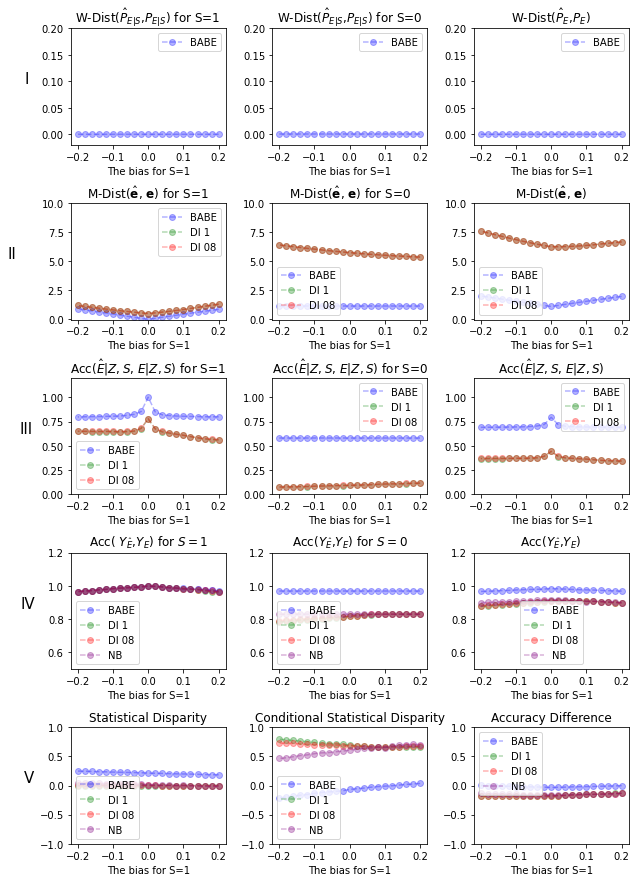

In [112]:
fig, axes = plt.subplots(5, 3,  figsize=(10,15))
#fig.suptitle('Results When Changing Bias for group 1')
plt.subplots_adjust(hspace=0.5, wspace=0.3)
a=21
b=42

axes[0][0].plot( biases1,'Wdist1', data=results.iloc[a:b], linestyle='--',marker='o', color="blue", alpha=0.3)

axes[0][0].set_ylim(-0.02,0.2)
axes[0][0].legend(['BABE', 'DI 1', 'DI 08'])
axes[0][0].set_xlabel('The bias for S=1')
axes[0][0].set_title(r'W-Dist($\hat{P}_{E|S}$,$P_{E|S}$) for S=1')
axes[0][0].set_ylabel('I',rotation=360, size=15,labelpad=15)

axes[0][1].plot( biases1,'Wdist0', data=results.iloc[a:b], linestyle='--',marker='o', color="blue", alpha=0.3)

axes[0][1].set_ylim(-0.02,0.2)
axes[0][1].set_title(r'W-Dist($\hat{P}_{E|S}$,$P_{E|S}$) for S=0')
axes[0][1].legend(['BABE', 'DI 1', 'DI 08'])
axes[0][1].set_xlabel('The bias for S=1')



axes[0][2].plot( biases1,'Wdist', data=results.iloc[a:b], linestyle='--',marker='o', color="blue", alpha=0.3)

axes[0][2].set_ylim(-0.02,0.2)
axes[0][2].set_xlabel('The bias for S=1')
axes[0][2].set_title(r'W-Dist($\hat{P}_{E}$,$P_{E}$)')
axes[0][2].legend(['BABE', 'DI 1', 'DI 08'])
axes[0][2].set_xlabel('The bias for S=1')



axes[1][0].plot( biases1,'MEIBU1', data=results.iloc[a:b], linestyle='--',marker='o', color="blue", alpha=0.3)
axes[1][0].plot( biases1,'MEDI11', data=results.iloc[a:b], linestyle='--',marker='o', color="green", alpha=0.3)
axes[1][0].plot( biases1,'MEDI081', data=results.iloc[a:b], linestyle='--',marker='o', color="red", alpha=0.3)
axes[1][0].set_ylim(-0.02,10)
axes[1][0].legend(['BABE', 'DI 1', 'DI 08'])
axes[1][0].set_xlabel('The bias for S=1')
axes[1][0].set_title(r'M-Dist($\hat{\bf{e}}}$, $\bf{e}$) for S=1')
axes[1][0].set_ylabel('II',rotation=360, size=15,labelpad=30)

axes[1][1].plot( biases1,'MEIBU0', data=results.iloc[a:b], linestyle='--',marker='o', color="blue", alpha=0.3)
axes[1][1].plot( biases1,'MEDI10', data=results.iloc[a:b], linestyle='--',marker='o', color="green", alpha=0.3)
axes[1][1].plot( biases1,'MEDI080', data=results.iloc[a:b], linestyle='--',marker='o', color="red", alpha=0.3)
axes[1][1].set_ylim(-0.02,10)
axes[1][1].set_title(r'M-Dist($\hat{\bf{e}}}$, $\bf{e}$) for S=0')
axes[1][1].legend(['BABE', 'DI 1', 'DI 08'])
axes[1][1].set_xlabel('The bias for S=1')


axes[1][2].plot( biases1,'MEIBU', data=results.iloc[a:b], linestyle='--',marker='o', color="blue", alpha=0.3)
axes[1][2].plot( biases1,'MEDI1', data=results.iloc[a:b], linestyle='--',marker='o', color="green", alpha=0.3)
axes[1][2].plot( biases1,'MEDI08', data=results.iloc[a:b], linestyle='--',marker='o', color="red", alpha=0.3)
axes[1][2].set_ylim(-0.02,10)
axes[1][2].set_xlabel('The bias for S=1')
axes[1][2].set_title(r'M-Dist($\hat{\bf{e}}}$, $\bf{e}$)')
axes[1][2].legend(['BABE', 'DI 1', 'DI 08'])
axes[1][2].set_xlabel('The bias for S=1')




axes[2][2].plot( biases1,'AccEIBU', data=results.iloc[a:b], linestyle='--',marker='o', color="blue", alpha=0.3)
axes[2][2].plot( biases1,'AccEDI1', data=results.iloc[a:b], linestyle='--',marker='o', color="green", alpha=0.3)
axes[2][2].plot( biases1,'AccEDI08', data=results.iloc[a:b], linestyle='--',marker='o', color="red", alpha=0.3)
axes[2][2].set_ylim(0,1.2)
axes[2][2].set_title(r'Acc($\hat{E}|Z,S$, $E|Z,S$)')
axes[2][2].set_xlabel('The bias for S=1')
axes[2][2].legend(['BABE', 'DI 1', 'DI 08'])

axes[2][1].plot( biases1,'AccEIBU0', data=results.iloc[a:b], linestyle='--',marker='o', color="blue", alpha=0.3)
axes[2][1].plot( biases1,'AccEDI10', data=results.iloc[a:b], linestyle='--',marker='o', color="green", alpha=0.3)
axes[2][1].plot( biases1,'AccEDI080', data=results.iloc[a:b], linestyle='--',marker='o', color="red", alpha=0.3)
axes[2][1].set_ylim(0,1.2)
axes[2][1].set_title(r'Acc($\hat{E}|Z,S$, $E|Z,S$) for S=0')
axes[2][1].set_xlabel('The bias for S=1')
axes[2][1].legend(['BABE', 'DI 1', 'DI 08'])

axes[2][0].plot( biases1,'AccEIBU1', data=results.iloc[a:b], linestyle='--',marker='o', color="blue", alpha=0.3)
axes[2][0].plot( biases1,'AccEDI11', data=results.iloc[a:b], linestyle='--',marker='o', color="green", alpha=0.3)
axes[2][0].plot( biases1,'AccEDI081', data=results.iloc[a:b], linestyle='--',marker='o', color="red", alpha=0.3)
axes[2][0].set_ylim(0,1.2)
axes[2][0].set_title(r'Acc($\hat{E}|Z,S$, $E|Z,S$) for S=1')
axes[2][0].set_xlabel('The bias for S=1')
axes[2][0].legend(['BABE', 'DI 1', 'DI 08'])
axes[2][0].set_ylabel('III',rotation=360, size=15, labelpad=15)



axes[3][2].plot( biases1,'AccYIBU', data=results.iloc[a:b], linestyle='--',marker='o', color="blue", alpha=0.3)
axes[3][2].plot( biases1,'AccYDI1', data=results.iloc[a:b], linestyle='--',marker='o', color="green", alpha=0.3)
axes[3][2].plot( biases1,'AccYDI08', data=results.iloc[a:b], linestyle='--',marker='o', color="red", alpha=0.3)
axes[3][2].plot( biases1,'AccYNB', data=results.iloc[a:b], linestyle='--',marker='o', color="purple", alpha=0.3)
axes[3][2].set_ylim(0.5,1.2)
axes[3][2].set_title(r'Acc($Y_{\hat{E}}$,$Y_E$)')
axes[3][2].set_xlabel('The bias for S=1')
axes[3][2].legend(['BABE', 'DI 1', 'DI 08', 'NB'])


axes[3][1].plot( biases1,'AccYIBU0', data=results.iloc[a:b], linestyle='--',marker='o', color="blue", alpha=0.3)
axes[3][1].plot( biases1,'AccYDI10', data=results.iloc[a:b], linestyle='--',marker='o', color="green", alpha=0.3)
axes[3][1].plot( biases1,'AccYDI080', data=results.iloc[a:b], linestyle='--',marker='o', color="red", alpha=0.3)
axes[3][1].plot( biases1,'AccYNB0', data=results.iloc[a:b], linestyle='--',marker='o', color="purple", alpha=0.3)
axes[3][1].set_ylim(0.5,1.2)
axes[3][1].set_title(r'Acc($Y_{\hat{E}}$,$Y_E$) for $S=0$' )
axes[3][1].set_xlabel('The bias for S=1')
axes[3][1].legend(['BABE', 'DI 1', 'DI 08', 'NB'])

axes[3][0].plot( biases1,'AccYIBU1', data=results.iloc[a:b], linestyle='--',marker='o', color="blue", alpha=0.3)
axes[3][0].plot( biases1,'AccYDI11', data=results.iloc[a:b], linestyle='--',marker='o', color="green", alpha=0.3)
axes[3][0].plot( biases1,'AccYDI081', data=results.iloc[a:b], linestyle='--',marker='o', color="red", alpha=0.3)
axes[3][0].plot( biases1,'AccYNB1', data=results.iloc[a:b], linestyle='--',marker='o', color="purple", alpha=0.3)
axes[3][0].set_ylim(0.5,1.2)
axes[3][0].set_title(r'Acc( $Y_{\hat{E}}$,$Y_E$) for $S=1$' )
axes[3][0].set_xlabel('The bias for S=1')
axes[3][0].legend(['BABE', 'DI 1', 'DI 08', 'NB'])
axes[3][0].set_ylabel('IV',rotation=360, size=15,labelpad=20)



axes[4][0].plot( biases1,'SPIBU', data=results.iloc[a:b], linestyle='--',marker='o', color="blue", alpha=0.3)
axes[4][0].plot( biases1,'SPDI1', data=results.iloc[a:b], linestyle='--',marker='o', color="green", alpha=0.3)
axes[4][0].plot( biases1,'SPDI08', data=results.iloc[a:b], linestyle='--',marker='o', color="red", alpha=0.3)
axes[4][0].plot( biases1,'SPNB', data=results.iloc[a:b], linestyle='--',marker='o', color="purple", alpha=0.3)
axes[4][0].set_ylim(-1,1)
axes[4][0].set_title('Statistical Disparity')
axes[4][0].set_xlabel('The bias for S=1')
axes[4][0].legend(['BABE', 'DI 1', 'DI 08', 'NB'])
axes[4][0].set_ylabel('V',rotation=360, size=15, labelpad=10)

axes[4][1].plot( biases1,'CSPIBU', data=results.iloc[a:b], linestyle='--',marker='o', color="blue", alpha=0.3)
axes[4][1].plot( biases1,'CSPDI1', data=results.iloc[a:b], linestyle='--',marker='o', color="green", alpha=0.3)
axes[4][1].plot( biases1,'CSPDI08', data=results.iloc[a:b], linestyle='--',marker='o', color="red", alpha=0.3)
axes[4][1].plot( biases1,'CSPNB', data=results.iloc[a:b], linestyle='--',marker='o', color="purple", alpha=0.3)
axes[4][1].set_ylim(-1,1)
axes[4][1].set_title('Conditional Statistical Disparity')
axes[4][1].set_xlabel('The bias for S=1')
axes[4][1].legend(['BABE', 'DI 1', 'DI 08', 'NB'])

axes[4][2].plot( biases1,results.iloc[a:b].AccYIBU0-results.iloc[a:b].AccYIBU1, linestyle='--',marker='o', color="blue", alpha=0.3)
axes[4][2].plot( biases1, results.iloc[a:b].AccYDI10-results.iloc[a:b].AccYDI11,linestyle='--',marker='o', color="green", alpha=0.3)
axes[4][2].plot( biases1, results.iloc[a:b].AccYDI080-results.iloc[a:b].AccYDI081,linestyle='--',marker='o', color="red", alpha=0.3)
axes[4][2].plot( biases1, results.iloc[a:b].AccYNB0-results.iloc[a:b].AccYNB1,linestyle='--',marker='o', color="purple", alpha=0.3)
axes[4][2].set_ylim(-1,1)
axes[4][2].set_title(r'Accuracy Difference')
axes[4][2].set_xlabel('The bias for S=1')
axes[4][2].legend(['BABE', 'DI 1', 'DI 08', 'NB'])


plt.savefig('Results_Synthetic_Biases.jpg')
